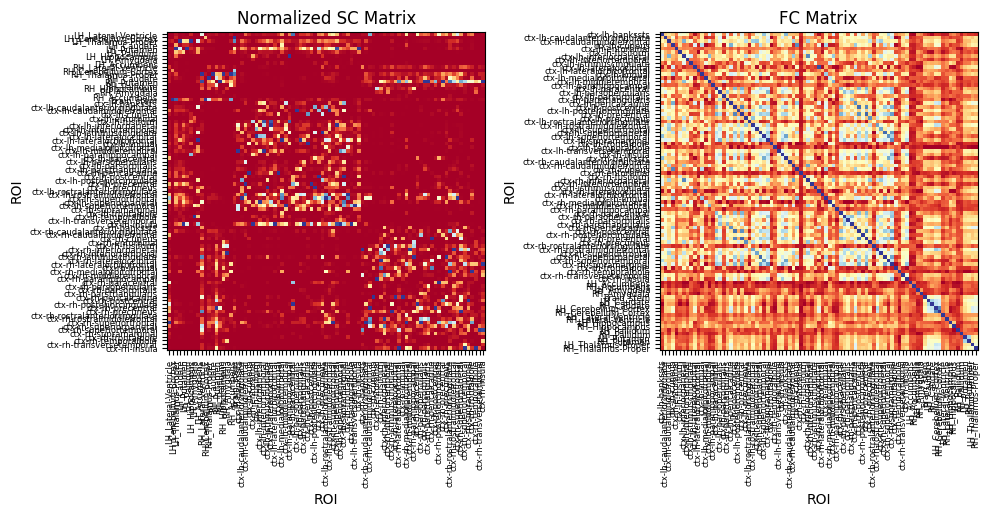

In [ ]:

fc_labels_file = 'C:/Users/hp/Desktop/CURRENTSEM/LABWORK_2Cfgs/fc_labels.txt'
sc_labels_file = 'C:/Users/hp/Desktop/CURRENTSEM/LABWORK_2Cfgs/sc_labels.txt'
with open(fc_labels_file, 'r') as f:
    fc_labels = [line.strip() for line in f.readlines()]

with open(sc_labels_file, 'r') as f:
    sc_labels = [line.strip() for line in f.readlines()]

assert len(fc_labels) == FC_data_norm.shape[1], "Mismatch between FC labels and matrix dimensions."
assert len(sc_labels) == SC_data_norm.shape[1], "Mismatch between SC labels and matrix dimensions."
output_file = 'C:/Users/hp/Downloads/sc_fc_with_rois_and_labels.npz'
np.savez_compressed(output_file, 
                    SC_data_norm=SC_data_norm, 
                    FC_data_norm=FC_data_norm, 
                    subject_ids=subject_ids, 
                    fc_labels=fc_labels, 
                    sc_labels=sc_labels)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(SC_data_norm[0], cmap='RdYlBu')
plt.title('Normalized SC Matrix')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.xticks(ticks=np.arange(len(sc_labels)), labels=sc_labels, rotation=90, fontsize=6)
plt.yticks(ticks=np.arange(len(sc_labels)), labels=sc_labels, fontsize=6)
plt.axis('on')

plt.subplot(122)
plt.imshow(FC_data_norm[0], cmap='RdYlBu')
plt.title('FC Matrix')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.xticks(ticks=np.arange(len(fc_labels)), labels=fc_labels, rotation=90, fontsize=6)
plt.yticks(ticks=np.arange(len(fc_labels)), labels=fc_labels, fontsize=6)
plt.axis('on')
plt.tight_layout()
plt.show()


In [ ]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


def clustering_and_nodal_efficiency(matrix):
    G = nx.from_numpy_array(matrix)
    clustering_coeffs = nx.clustering(G, weight='weight')
    nodal_efficiency = {}
    for node in G.nodes():
        lengths = nx.single_source_dijkstra_path_length(G, node, weight='weight')
        efficiency = sum(1.0 / dist for dist in lengths.values() if dist > 0) / (len(G.nodes) - 1)
        nodal_efficiency[node] = efficiency

    return clustering_coeffs, nodal_efficiency


def normalize_matrix(matrix):
   
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(matrix)


def identify_hubs(matrix):
    G = nx.from_numpy_array(matrix)
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    return degree_centrality, betweenness_centrality, hubs

def compute_modularity(matrix):
    
    import community as community_louvain  
    G = nx.from_numpy_array(matrix)
    partition = community_louvain.best_partition(G, weight='weight')
    modularity_score = community_louvain.modularity(partition, G)
    return partition, modularity_score



example_SC = SC_data_norm[0]  
example_FC = FC_data_norm[0]       

example_SC_norm = (example_SC)
example_FC_norm = (example_FC)


Top 5 Nodes by SC Clustering Coefficient:
LH_Amygdala: 0.1105
LH_Accumbens: 0.1061
ctx-lh-entorhinal: 0.0822
ctx-lh-insula: 0.0647
ctx-lh-supramarginal: 0.0616

Top 5 Nodes by FC Clustering Coefficient:
ctx-lh-supramarginal: 0.3513
ctx-rh-superiorfrontal: 0.3485
ctx-lh-parsopercularis: 0.3393
ctx-rh-rostralmiddlefrontal: 0.3382
ctx-lh-superiorparietal: 0.3361

Ranking of Bilateral Frontal Pole in SC Clustering Coefficients:
ctx-lh-frontalpole: 75
ctx-rh-frontalpole: 86

Ranking of Bilateral Frontal Pole in FC Clustering Coefficients:
ctx-rh-frontalpole: 76
ctx-lh-frontalpole: 78


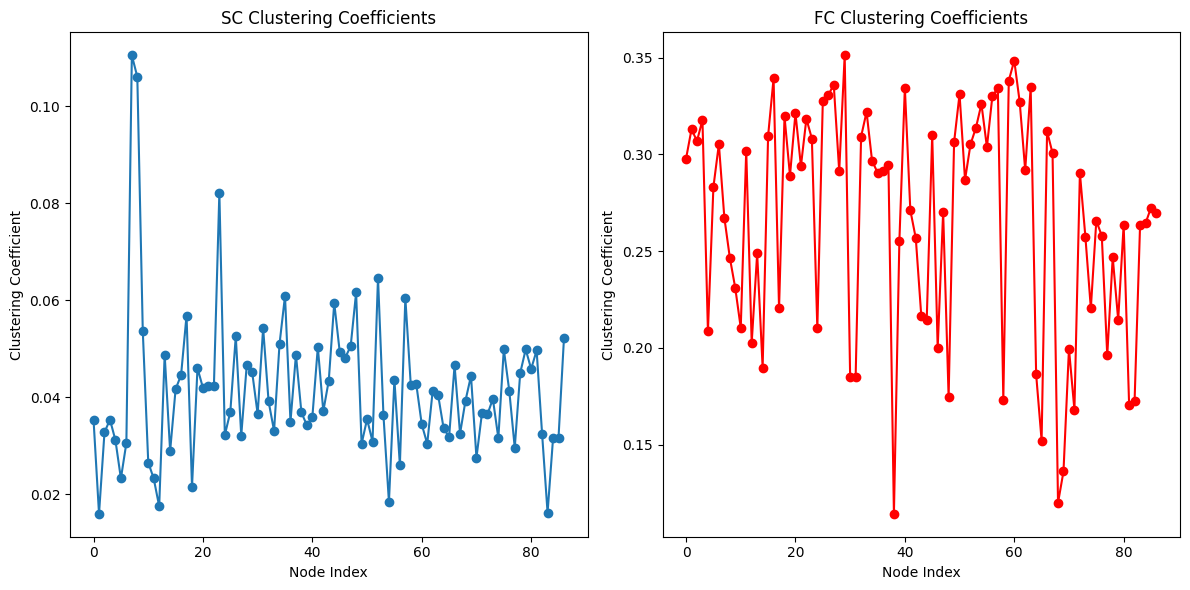

In [ ]:

SC_clustering, SC_nodal_efficiency = clustering_and_nodal_efficiency(example_SC_norm)
FC_clustering, FC_nodal_efficiency = clustering_and_nodal_efficiency(example_FC_norm)


SC_clustering_with_names = {sc_labels[i]: SC_clustering[i] for i in range(len(SC_clustering))}
FC_clustering_with_names = {fc_labels[i]: FC_clustering[i] for i in range(len(FC_clustering))}


top_SC_clustering = sorted(SC_clustering_with_names.items(), key=lambda x: x[1], reverse=True)[:5]
top_FC_clustering = sorted(FC_clustering_with_names.items(), key=lambda x: x[1], reverse=True)[:5]


bilateral_fp = ["ctx-lh-frontalpole", "ctx-rh-frontalpole"]


SC_clustering_sorted = sorted(SC_clustering_with_names.items(), key=lambda x: x[1], reverse=True)
SC_bilateral_fp_ranking = {roi: rank + 1 for rank, (roi, _) in enumerate(SC_clustering_sorted) if roi in bilateral_fp}


FC_clustering_sorted = sorted(FC_clustering_with_names.items(), key=lambda x: x[1], reverse=True)
FC_bilateral_fp_ranking = {roi: rank + 1 for rank, (roi, _) in enumerate(FC_clustering_sorted) if roi in bilateral_fp}


print("Top 5 Nodes by SC Clustering Coefficient:")
for roi, value in top_SC_clustering:
    print(f"{roi}: {value:.4f}")

print("\nTop 5 Nodes by FC Clustering Coefficient:")
for roi, value in top_FC_clustering:
    print(f"{roi}: {value:.4f}")


print("\nRanking of Bilateral Frontal Pole in SC Clustering Coefficients:")
for roi, rank in SC_bilateral_fp_ranking.items():
    print(f"{roi}: {rank}")

print("\nRanking of Bilateral Frontal Pole in FC Clustering Coefficients:")
for roi, rank in FC_bilateral_fp_ranking.items():
    print(f"{roi}: {rank}")


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(list(SC_clustering.values()), label='SC Clustering', marker='o')
plt.title("SC Clustering Coefficients")
plt.xlabel("Node Index")
plt.ylabel("Clustering Coefficient")

plt.subplot(122)
plt.plot(list(FC_clustering.values()), label='FC Clustering', marker='o', color='red')
plt.title("FC Clustering Coefficients")
plt.xlabel("Node Index")
plt.ylabel("Clustering Coefficient")

plt.tight_layout()
plt.show()


SOURCE:  Investigating robust associations
between functional connectivity
based on graph theory and general
intelligence

Top 5 Nodes by SC Degree Centrality:
LH_Lateral-Ventricle: 0.9070
LH_Thalamus-Proper: 0.8721
brain_stem: 0.8721
ctx-rh-caudalanteriorcingulate: 0.8721
ctx-rh-superiorfrontal: 0.8721

Top 5 Nodes by FC Degree Centrality:
ctx-lh-bankssts: 1.0233
ctx-lh-caudalanteriorcingulate: 1.0233
ctx-lh-caudalmiddlefrontal: 1.0233
ctx-lh-cuneus: 1.0233
ctx-lh-fusiform: 1.0233

Top 5 Nodes by SC Betweenness Centrality:
ctx-lh-insula: 0.2048
LH_Putamen: 0.2015
RH_Thalamus-Proper: 0.1509
ctx-rh-bankssts: 0.1208
RH_Caudate: 0.1120

Top 5 Nodes by FC Betweenness Centrality:
ctx-rh-entorhinal: 0.2996
LH_Accumbens: 0.2049
ctx-rh-frontalpole: 0.1311
ctx-rh-temporalpole: 0.1053
ctx-rh-medialorbitofrontal: 0.0780

Ranking of Bilateral Frontal Pole in SC Degree Centrality:
ctx-rh-frontalpole: 56
ctx-lh-frontalpole: 77

Ranking of Bilateral Frontal Pole in SC Betweenness Centrality:
ctx-lh-frontalpole: 45
ctx-rh-frontalpole: 86

Ranking of Bilateral Frontal Pole in FC Degree Centrality:
ctx-lh-frontalpole: 28
ct

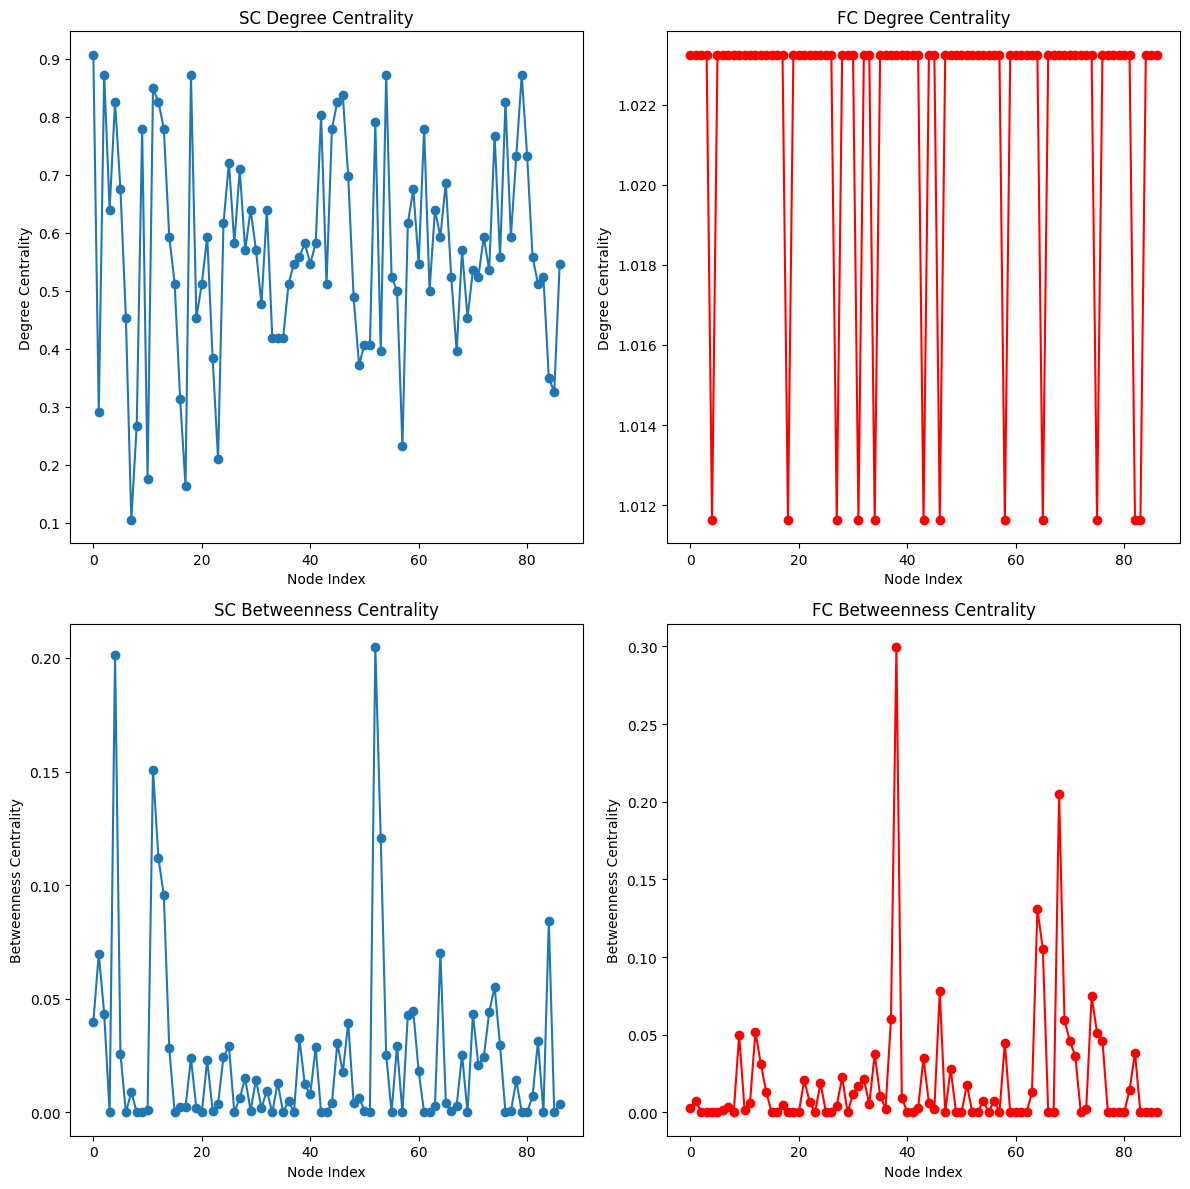

In [ ]:

SC_degree, SC_betweenness, SC_hubs = identify_hubs(example_SC_norm)
FC_degree, FC_betweenness, FC_hubs = identify_hubs(example_FC_norm)


SC_degree_with_names = {sc_labels[i]: SC_degree[i] for i in range(len(SC_degree))}
FC_degree_with_names = {fc_labels[i]: FC_degree[i] for i in range(len(FC_degree))}

SC_betweenness_with_names = {sc_labels[i]: SC_betweenness[i] for i in range(len(SC_betweenness))}
FC_betweenness_with_names = {fc_labels[i]: FC_betweenness[i] for i in range(len(FC_betweenness))}


top_SC_degree = sorted(SC_degree_with_names.items(), key=lambda x: x[1], reverse=True)[:5]
top_FC_degree = sorted(FC_degree_with_names.items(), key=lambda x: x[1], reverse=True)[:5]

top_SC_betweenness = sorted(SC_betweenness_with_names.items(), key=lambda x: x[1], reverse=True)[:5]
top_FC_betweenness = sorted(FC_betweenness_with_names.items(), key=lambda x: x[1], reverse=True)[:5]


bilateral_fp = ["ctx-lh-frontalpole", "ctx-rh-frontalpole"]


SC_degree_sorted = sorted(SC_degree_with_names.items(), key=lambda x: x[1], reverse=True)
SC_betweenness_sorted = sorted(SC_betweenness_with_names.items(), key=lambda x: x[1], reverse=True)
SC_bilateral_fp_rank_degree = {roi: rank + 1 for rank, (roi, _) in enumerate(SC_degree_sorted) if roi in bilateral_fp}
SC_bilateral_fp_rank_betweenness = {roi: rank + 1 for rank, (roi, _) in enumerate(SC_betweenness_sorted) if roi in bilateral_fp}


FC_degree_sorted = sorted(FC_degree_with_names.items(), key=lambda x: x[1], reverse=True)
FC_betweenness_sorted = sorted(FC_betweenness_with_names.items(), key=lambda x: x[1], reverse=True)
FC_bilateral_fp_rank_degree = {roi: rank + 1 for rank, (roi, _) in enumerate(FC_degree_sorted) if roi in bilateral_fp}
FC_bilateral_fp_rank_betweenness = {roi: rank + 1 for rank, (roi, _) in enumerate(FC_betweenness_sorted) if roi in bilateral_fp}


print("Top 5 Nodes by SC Degree Centrality:")
for roi, value in top_SC_degree:
    print(f"{roi}: {value:.4f}")

print("\nTop 5 Nodes by FC Degree Centrality:")
for roi, value in top_FC_degree:
    print(f"{roi}: {value:.4f}")

print("\nTop 5 Nodes by SC Betweenness Centrality:")
for roi, value in top_SC_betweenness:
    print(f"{roi}: {value:.4f}")

print("\nTop 5 Nodes by FC Betweenness Centrality:")
for roi, value in top_FC_betweenness:
    print(f"{roi}: {value:.4f}")

print("\nRanking of Bilateral Frontal Pole in SC Degree Centrality:")
for roi, rank in SC_bilateral_fp_rank_degree.items():
    print(f"{roi}: {rank}")

print("\nRanking of Bilateral Frontal Pole in SC Betweenness Centrality:")
for roi, rank in SC_bilateral_fp_rank_betweenness.items():
    print(f"{roi}: {rank}")

print("\nRanking of Bilateral Frontal Pole in FC Degree Centrality:")
for roi, rank in FC_bilateral_fp_rank_degree.items():
    print(f"{roi}: {rank}")

print("\nRanking of Bilateral Frontal Pole in FC Betweenness Centrality:")
for roi, rank in FC_bilateral_fp_rank_betweenness.items():
    print(f"{roi}: {rank}")


plt.figure(figsize=(12, 12))


plt.subplot(221)
plt.plot(list(SC_degree.values()), label='SC Degree Centrality', marker='o')
plt.title("SC Degree Centrality")
plt.xlabel("Node Index")
plt.ylabel("Degree Centrality")

plt.subplot(222)
plt.plot(list(FC_degree.values()), label='FC Degree Centrality', marker='o', color='red')
plt.title("FC Degree Centrality")
plt.xlabel("Node Index")
plt.ylabel("Degree Centrality")


plt.subplot(223)
plt.plot(list(SC_betweenness.values()), label='SC Betweenness Centrality', marker='o')
plt.title("SC Betweenness Centrality")
plt.xlabel("Node Index")
plt.ylabel("Betweenness Centrality")

plt.subplot(224)
plt.plot(list(FC_betweenness.values()), label='FC Betweenness Centrality', marker='o', color='red')
plt.title("FC Betweenness Centrality")
plt.xlabel("Node Index")
plt.ylabel("Betweenness Centrality")

plt.tight_layout()
plt.show()


SC Modularity: 0.4376597164275644
FC Modularity: 0.1483983720897612


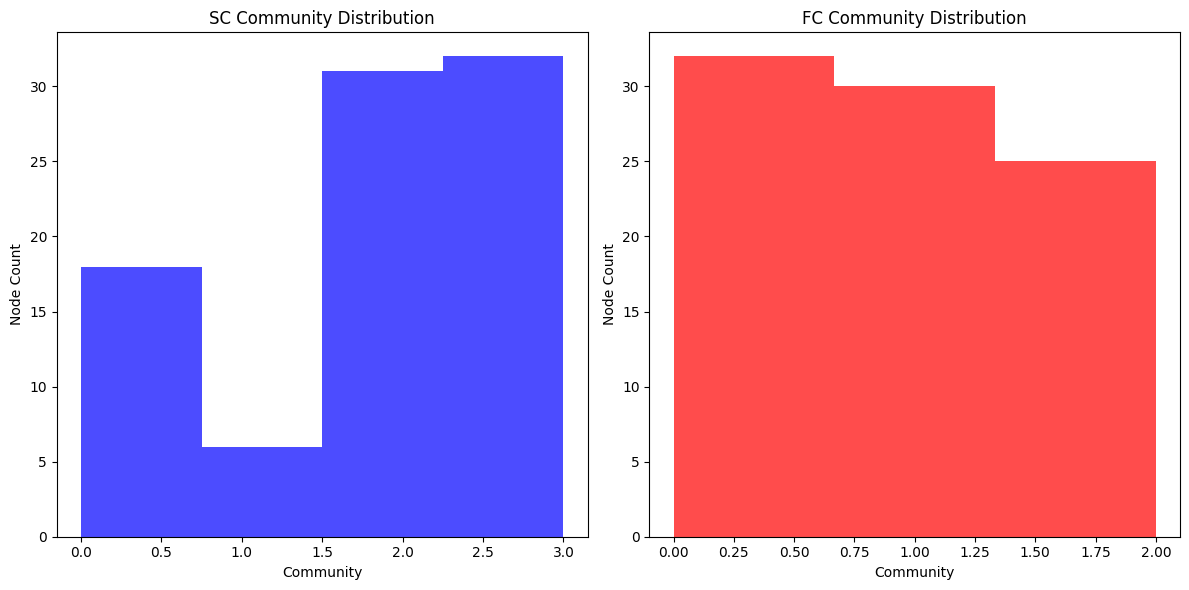

In [23]:

SC_partition, SC_modularity = compute_modularity(example_SC_norm)
FC_partition, FC_modularity = compute_modularity(example_FC_norm)


print("SC Modularity:", SC_modularity)
print("FC Modularity:", FC_modularity)


SC_communities = sorted(SC_partition.values())
FC_communities = sorted(FC_partition.values())

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(SC_communities, bins=len(set(SC_communities)), color='blue', alpha=0.7)
plt.title("SC Community Distribution")
plt.xlabel("Community")
plt.ylabel("Node Count")

plt.subplot(122)
plt.hist(FC_communities, bins=len(set(FC_communities)), color='red', alpha=0.7)
plt.title("FC Community Distribution")
plt.xlabel("Community")
plt.ylabel("Node Count")

plt.tight_layout()
plt.show()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


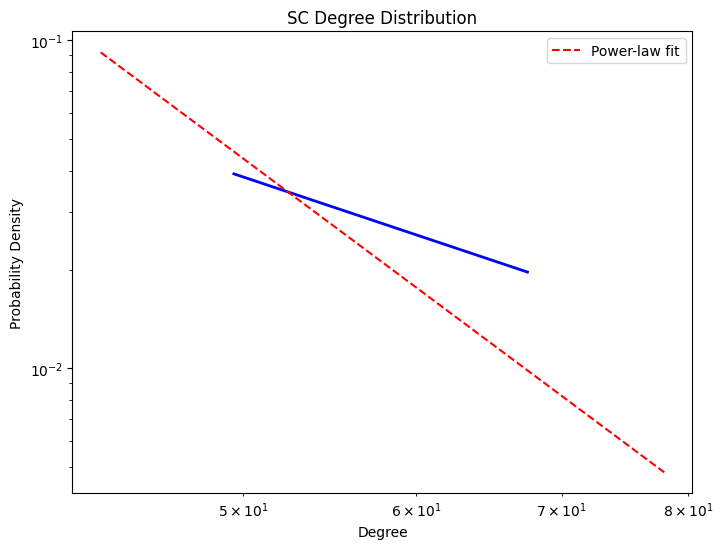

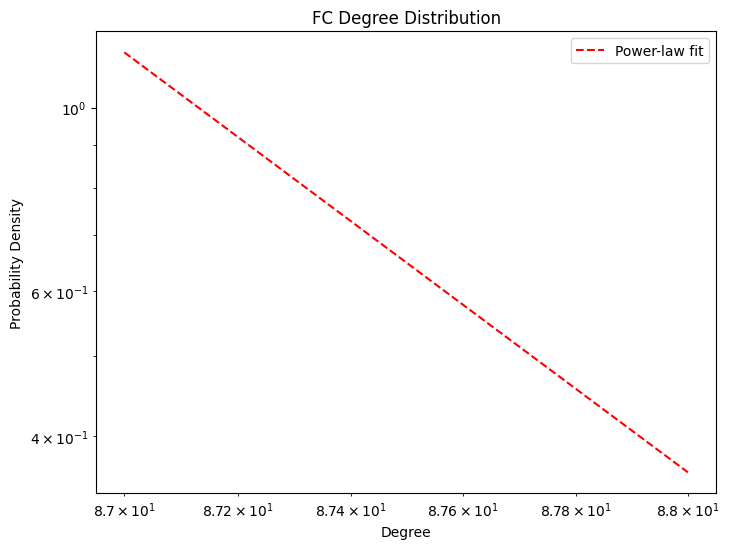

SC Power-law Exponent: 4.94983497570521
FC Power-law Exponent: 102.49889522847454


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from powerlaw import Fit


def check_scale_free(matrix):
    G = nx.from_numpy_array(matrix)
    degree_sequence = [G.degree(node) for node in G.nodes()]
    fit = Fit(degree_sequence)
    return degree_sequence, fit


def plot_degree_distribution(degree_sequence, fit, title="Degree Distribution"):
    
    plt.figure(figsize=(8, 6))
    fit.plot_pdf(color='b', linewidth=2)  
    fit.power_law.plot_pdf(color='r', linestyle='--', label='Power-law fit')  
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.title(title)-+++
    plt.legend()
    plt.show()

SC_degree_sequence, SC_fit = check_scale_free(example_SC_norm)
FC_degree_sequence, FC_fit = check_scale_free(example_FC_norm)
plot_degree_distribution(SC_degree_sequence, SC_fit, title="SC Degree Distribution")
plot_degree_distribution(FC_degree_sequence, FC_fit, title="FC Degree Distribution")
print(f"SC Power-law Exponent: {SC_fit.alpha}")
print(f"FC Power-law Exponent: {FC_fit.alpha}")
